In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 3.3.2 Structured data types

In [2]:
# sensor_code: 4-character string
# position: float
# value: float
samples = np.zeros((6, ), dtype=[('sensor_code', 'S4'), ('position', float), ('value', float)])

In [3]:
samples[0]

('', 0., 0.)

In [4]:
samples.ndim

1

In [5]:
samples.shape

(6L,)

In [6]:
samples.dtype

dtype([('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

In [7]:
samples[:] = [('ALFA', 1, 0.37), ('BETA', 1, 0.11), ('TAU', 1, 0.13),
              ('ALFA', 1.5, 0.37), ('ALFA', 3, 0.11), ('TAU', 1.2, 0.13)]

In [8]:
samples

array([('ALFA', 1. , 0.37), ('BETA', 1. , 0.11), ('TAU', 1. , 0.13),
       ('ALFA', 1.5, 0.37), ('ALFA', 3. , 0.11), ('TAU', 1.2, 0.13)],
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

In [9]:
samples['sensor_code']

array(['ALFA', 'BETA', 'TAU', 'ALFA', 'ALFA', 'TAU'], dtype='|S4')

In [10]:
samples['position']

array([1. , 1. , 1. , 1.5, 3. , 1.2])

In [11]:
samples[samples['sensor_code'] == 'ALFA']

array([('ALFA', 1. , 0.37), ('ALFA', 1.5, 0.37), ('ALFA', 3. , 0.11)],
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

# 3.3.3 maskedarray: dealing with (propagation of) missing data

In [12]:
x = np.ma.array([1, 2, 3, 4], mask=[0, 1, 0, 1])

In [13]:
x

masked_array(data=[1, --, 3, --],
             mask=[False,  True, False,  True],
       fill_value=999999)

In [14]:
y = np.ma.array([1, 2, 3, 4], mask=[0, 1, 1, 1])

In [15]:
y

masked_array(data=[1, --, --, --],
             mask=[False,  True,  True,  True],
       fill_value=999999)

In [16]:
x + y

masked_array(data=[2, --, --, --],
             mask=[False,  True,  True,  True],
       fill_value=999999)

In [17]:
np.ma.sqrt([1, -1, 2, -2])

masked_array(data=[1.0, --, 1.4142135623730951, --],
             mask=[False,  True, False,  True],
       fill_value=1e+20)

# 3.4 Advanced operations

## 3.4.1 Polynomials

In [18]:
p = np.poly1d([3, 2, -1])

In [19]:
p.roots

array([-1.        ,  0.33333333])

In [20]:
p.order

2

In [21]:
x = np.linspace(0, 1, 20)

In [22]:
y = np.cos(x) + 0.3 * np.random.rand(20)

In [23]:
p = np.poly1d(np.polyfit(x, y, 3))

In [24]:
t = np.linspace(0, 1, 200)

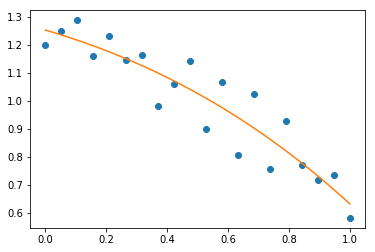

In [25]:
plt.plot(x, y, 'o', t, p(t), '-')

More polynomials

In [26]:
p = np.polynomial.Polynomial([-1, 2, 3]) # coefs in diff order!

In [27]:
t = np.linspace(0, 1, 200)

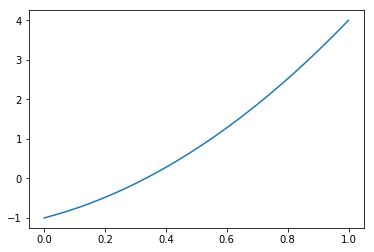

In [28]:
plt.plot(t, p(t), '-')

Chebyshev basis

In [29]:
x = np.linspace(-1, 1, 2000)
y = np.cos(x) + 0.3 * np.random.rand(2000)

In [30]:
p = np.polynomial.Chebyshev.fit(x, y, 50)

In [31]:
t = np.linspace(-1, 1, 200)

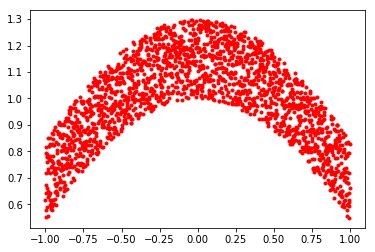

In [32]:
plt.plot(x, y, 'r.')

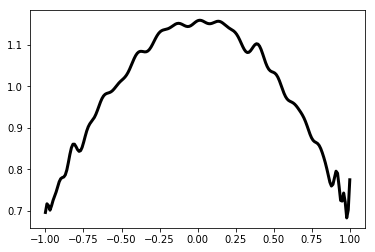

In [33]:
plt.plot(t, p(t), 'k-', lw=3)

# 4.4 Figures, Subplots, Axes and Ticks
## 4.4.11 3D Plots

In [34]:
from mpl_toolkits.mplot3d import Axes3D

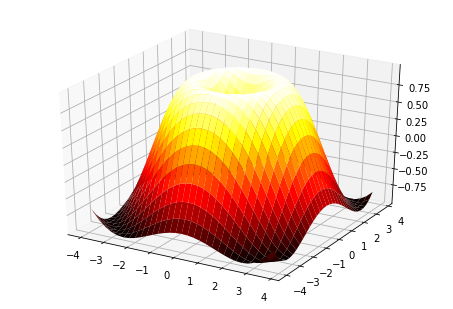

In [35]:
fig = plt.figure()
ax = Axes3D(fig)

X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

# 5. Scipy

## 5.1 File input/output scipy.io

In [36]:
from scipy import io as spio

In [37]:
a = np.ones((3, 3))
b = np.ones(3)

In [38]:
spio.savemat('file.mat', {'a': a, 'b': b})

In [39]:
data = spio.loadmat('file.mat')

In [40]:
# matlab does not represent 1D arrays so data['b'] will be 2D array 
data

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Jun 21 16:29:38 2018',
 '__version__': '1.0',
 'a': array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 'b': array([[1., 1., 1.]])}

## 5.3 Linear algebra operations: scipy.linalg

In [41]:
from scipy import linalg

In [42]:
arr = np.array([[1, 2], [3, 4]])

In [43]:
# compute the determinant of a square matrix
linalg.det(arr)

-2.0

In [44]:
# compute inverse of a square matrix
linalg.inv(arr)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [45]:
np.allclose(np.dot(arr, linalg.inv(arr)), np.eye(2))

True

In [46]:
# compute singular-value decomposition (SVD)
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

In [47]:
svd_mat = uarr.dot(np.diag(spec)).dot(vharr)

In [48]:
np.allclose(svd_mat, arr)

True

## 5.4 Interpolation: scipy.interpolate

In [49]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10) * 2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

In [50]:
from scipy.interpolate import interp1d

In [51]:
linear_interp = interp1d(measured_time, measures)

In [52]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')

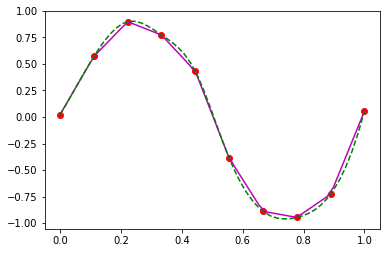

In [53]:
t = np.linspace(0, 1, 50)
plt.plot(measured_time, measures, 'ro', t, linear_interp(t), 'm-', t, cubic_interp(t), 'g--')

## 5.5 Optimization and fit : scipy.optimize

In [54]:
from scipy import optimize

### 5.5.1 Curve fitting

In [55]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

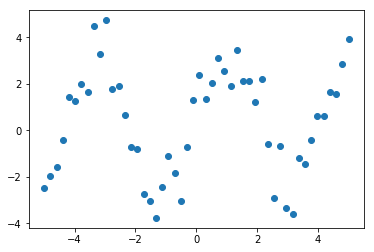

In [56]:
plt.plot(x_data, y_data, 'o')

In [57]:
def test_func(x, a, b):
    return a * np.sin(b * x)

In [58]:
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])

In [59]:
print("params", params)

('params', array([2.96789257, 1.49343943]))


### 5.5.2 Finding the minimum of a scalar function

In [60]:
def f(x):
    return x**2 + 10. * np.sin(x)

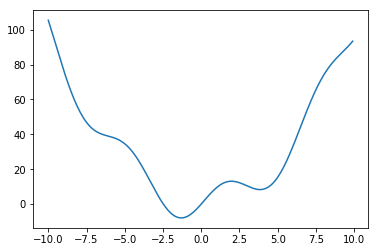

In [61]:
x = np.arange(-10, 10, 0.1)
# global minimum around -1.3 and a local minimum around 3.8

plt.plot(x, f(x))

In [62]:
# cost 18 functions evaluation
optimize.minimize(f, x0=0)

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

In [63]:
# cost 12 functions evaluation
optimize.minimize(f, x0=0, method='L-BFGS-B')

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.42108547e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644013])

In [64]:
# Stuck at local minima
optimize.minimize(f, x0=8)

      fun: 8.31558557947746
 hess_inv: array([[0.11885637]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([3.8374671])

Use basinhopping() -> combine optimizer with sampling of starting points

In [65]:
optimize.basinhopping(f, 8, 1000)

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[0.08578774]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 18780
                        nit: 1000
                       njev: 6260
                          x: array([-1.30644001])

**Constrainst**: We can constrain the variable to the interval *(0, 10)* using the **bounds** argument

In [66]:
optimize.minimize(f, x0=1, bounds=((0, 10), ))

      fun: array([0.])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([10.00000001])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
   status: 0
  success: True
        x: array([0.])

### 5.5.3 Finding the roots of a scalar function

To find a root, i.e a point where **f(x) = 0**, use `scipy.optimize.root()`

**Note**: only one root is found

In [67]:
optimize.root(f, x0=1)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.])

## 5.6 Statistics and random numbers: scipy.stats

### 5.6.1 Distributions: histogram and probability density function

In [68]:
from scipy import stats

In [69]:
samples = np.random.normal(size=1000)

In [70]:
bins = np.arange(-4, 5)
print(bins)

[-4 -3 -2 -1  0  1  2  3  4]


In [71]:
histogram = np.histogram(samples, bins=bins, normed=True)[0]

In [72]:
histogram

array([0.   , 0.029, 0.156, 0.347, 0.321, 0.126, 0.021, 0.   ])

In [73]:
bins = 0.5 * (bins[1:] + bins[:-1])
print(bins)

[-3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5]


In [74]:
pdf = stats.norm.pdf(bins)

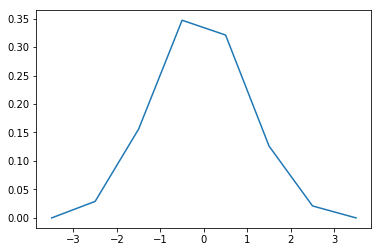

In [75]:
plt.plot(bins, histogram)

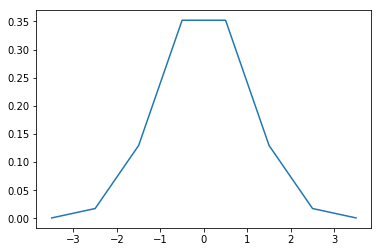

In [76]:
plt.plot(bins, pdf)

### 5.11.2 Non linear least squares curve fitting

In [87]:
waveform_1 = np.load("data/waveform_2.npy")

In [88]:
t = np.arange(len(waveform_1))

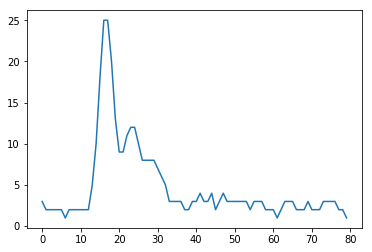

In [89]:
plt.plot(t, waveform_1)

Fitting a waveform with a simple Gaussian model

1. define the model

In [90]:
def model(t, coeffs):
    return coeffs[0] + coeffs[1] * np.exp( - ((t-coeffs[2]) / coeffs[3]) ** 2)

2. propose an initial solution

In [91]:
x0 = np.array([3, 30, 15, 1], dtype=float)

3. Fit

In [92]:
def residuals(coeffs, y, t):
    return y - model(t, coeffs)

In [93]:
from scipy.optimize import leastsq

In [94]:
x, flag = leastsq(residuals, x0, args=(waveform_1, t))

In [95]:
x

array([ 3.42238161, 21.51699352, 16.81032545,  2.75866087])

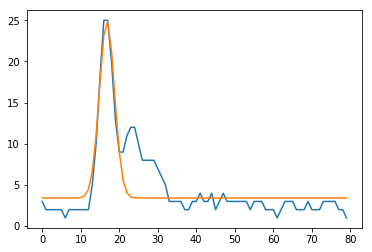

In [96]:
plt.plot(t, waveform_1, t, model(t, x))